In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [418]:
df=pd.read_csv(r'C:\Users\Rahul Airan\Desktop\Skill Development\Project\Diabetes-Prediction-using-ML-AND-DL-main\diabetes.csv')

In [419]:
# Show first five observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [420]:
# Returning dimensions of dataframe
df.shape

(768, 9)

In [421]:
# Get Summary of Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [422]:
# Returning no. of missing values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [423]:
# Get Statistics of Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [424]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

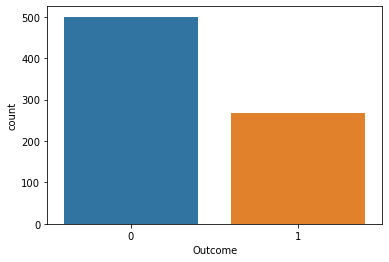

In [425]:
sns.countplot(x='Outcome',data=df)

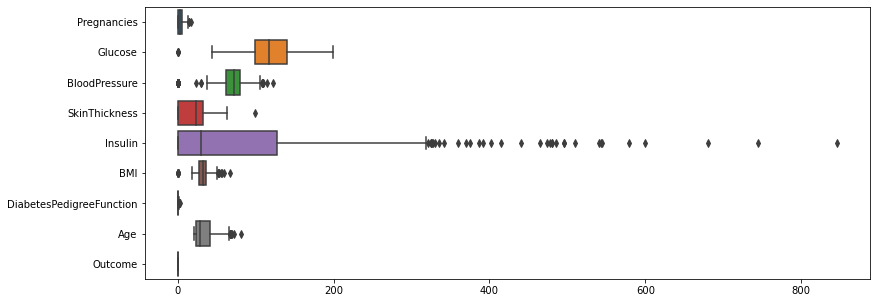

In [426]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

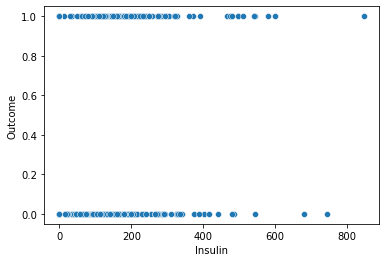

In [427]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome']) #Valid Outlier
plt.show()

# Replacing 0 with Mean with respective columns

In [428]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [429]:
#Replacing 0 by Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [430]:
# Again, getting no. of missing values in each column 

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

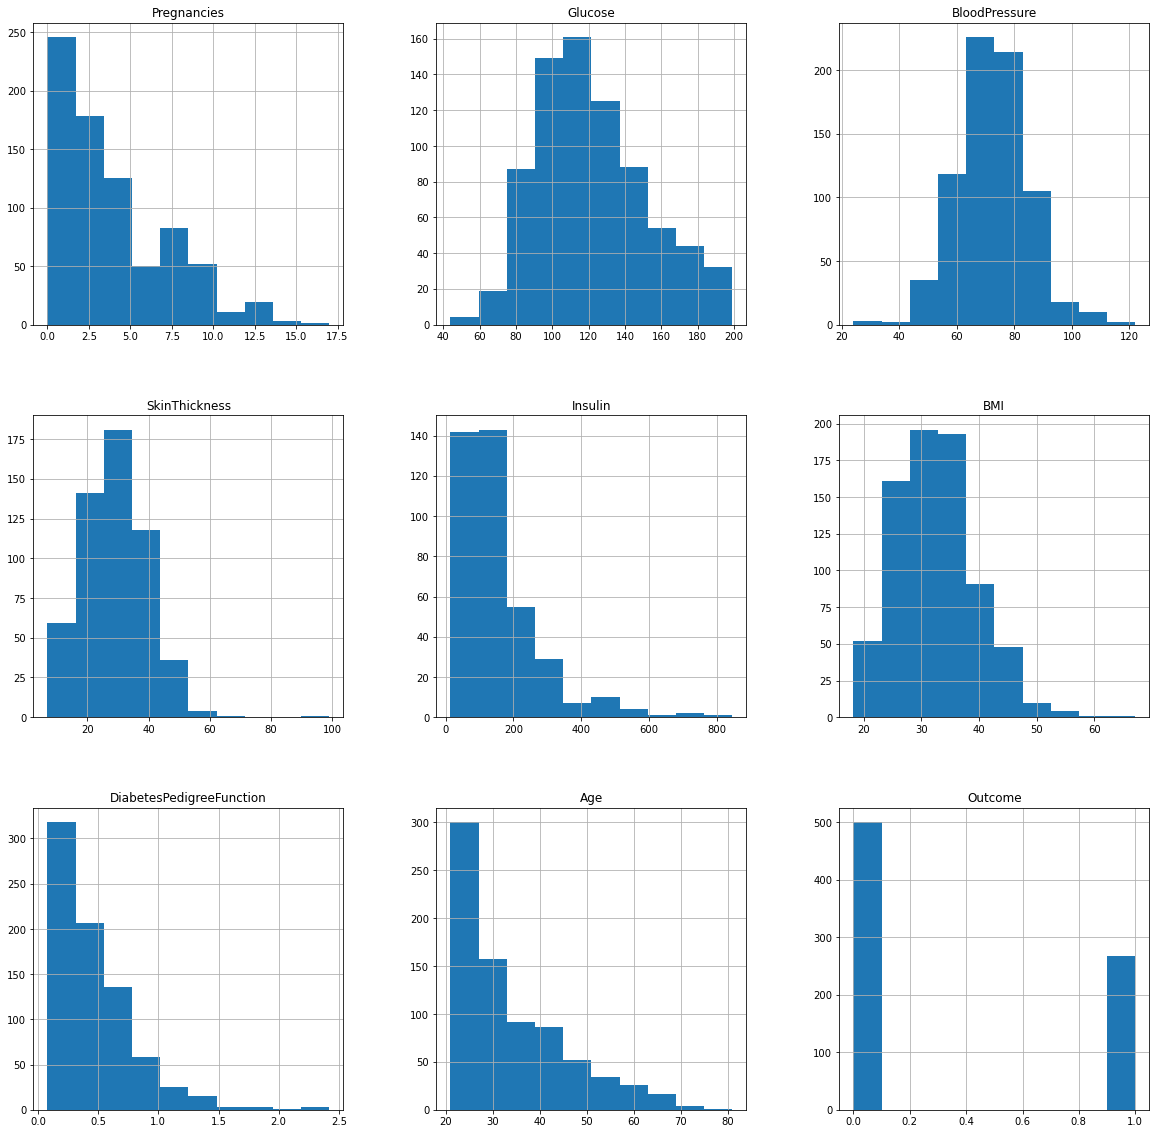

In [431]:
# Data Visualization to understand Data Distribution Before filling NaN values 
p = df.hist(figsize = (20,20))

In [432]:
#Filling Nan Values

df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [433]:
# Checking if missing values in each column is replaced

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

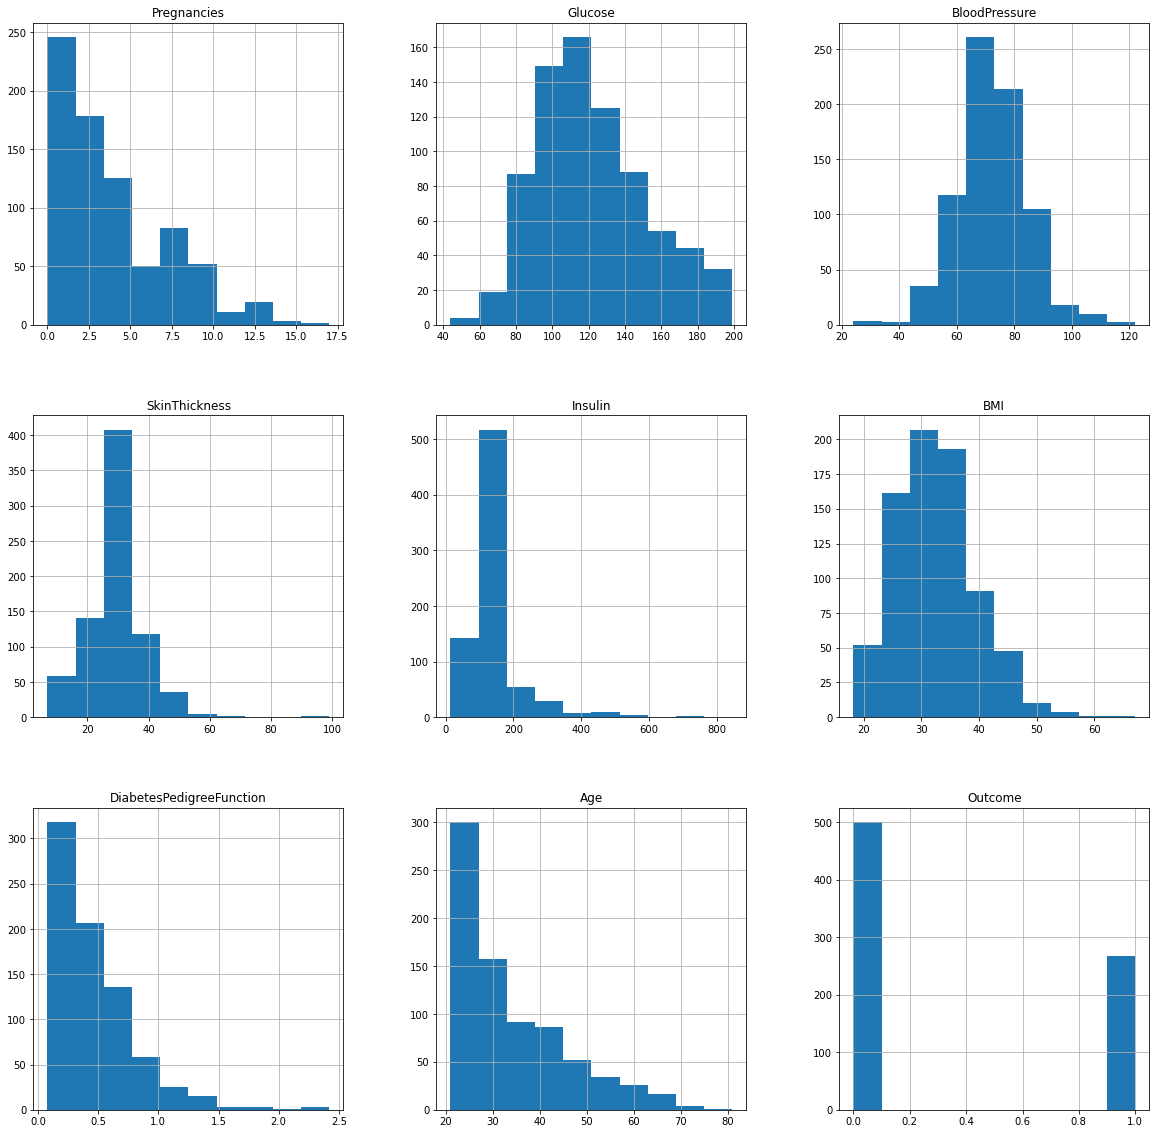

In [434]:
# Data Visualization after Nan Removal
p = df.hist(figsize = (20,20))

In [435]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


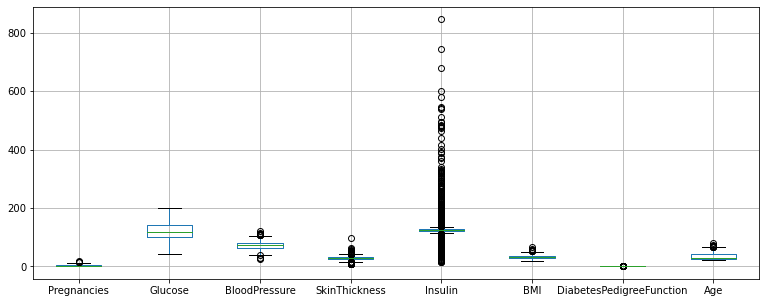

In [436]:
X.boxplot(figsize=(13,5))
plt.show()

# Splitting of data for training and testing

In [437]:
X=df.drop('Outcome',axis=1)

In [438]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [439]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [440]:
Y=df['Outcome']

In [441]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [442]:
from sklearn.model_selection import train_test_split

In [443]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20,random_state=9,shuffle=True)

In [444]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
476,2,105.0,80.0,45.0,191.0,33.7,0.711,29
448,0,104.0,64.0,37.0,64.0,33.6,0.510,22
518,13,76.0,60.0,29.0,125.0,32.8,0.180,41
221,2,158.0,90.0,29.0,125.0,31.6,0.805,66
453,2,119.0,72.0,29.0,125.0,19.6,0.832,72
...,...,...,...,...,...,...,...,...
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41
501,3,84.0,72.0,32.0,125.0,37.2,0.267,28
638,7,97.0,76.0,32.0,91.0,40.9,0.871,32
348,3,99.0,62.0,19.0,74.0,21.8,0.279,26


In [445]:
Y_train

476    1
448    1
518    0
221    1
453    0
      ..
56     1
501    0
638    1
348    0
382    0
Name: Outcome, Length: 614, dtype: int64

# Standard Scaler

In [446]:
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler()

In [447]:
#X_train=std.fit_transform(X_train)
#X_test=std.transform(X_test)

In [448]:
#X_train

In [449]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train our Model

# Logistic Regression

In [450]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [451]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [452]:
Y_pred=lr.predict(X_test)

In [453]:
Y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [454]:
Y_test

456    0
260    0
651    0
143    1
666    1
      ..
583    0
586    1
478    0
655    1
32     0
Name: Outcome, Length: 154, dtype: int64

In [455]:
from sklearn.metrics import accuracy_score

In [456]:
accuracy_score(Y_test,Y_pred) * 100

75.32467532467533

In [457]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, Y_pred))

0.24675324675324675


# Decision Tree

In [458]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [459]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [460]:
Y_pred=dt.predict(X_test)

In [461]:
Y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [462]:
Y_test

456    0
260    0
651    0
143    1
666    1
      ..
583    0
586    1
478    0
655    1
32     0
Name: Outcome, Length: 154, dtype: int64

In [463]:
accuracy_score(Y_test,Y_pred)

0.6948051948051948

In [464]:
print(mean_squared_error(Y_test, Y_pred))

0.3051948051948052


# Deep learning

In [465]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8))

In [466]:
mlp.fit(X_train,Y_train)

C:\Users\Rahul Airan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8))

In [467]:
Y_pred=mlp.predict(X_test)

In [468]:
accuracy_score(Y_test,Y_pred)

0.7532467532467533

In [469]:
print(mean_squared_error(Y_test, Y_pred))

0.24675324675324675


# Gradient Boosters

In [470]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [471]:
gbr.fit(X = X_train, y = Y_train)

GradientBoostingRegressor()

In [472]:
Y_pred = gbr.predict(X = X_test)

In [473]:
print(mean_squared_error(Y_test, Y_pred))

0.16439934938251355


In [474]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:,1])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]


In [475]:
accuracy_score(Y_test,Y_pred)
#accuracy_score(Y_test, Y_pred, normalize=False)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Linear Regression

In [476]:
from sklearn.linear_model import LinearRegression

In [477]:
lr = LinearRegression()

In [478]:
lr.fit(X_train, Y_train)

LinearRegression()

In [479]:
Y_pred = lr.predict(X_test)

In [480]:
mean_squared_error(Y_test, Y_pred)

0.17572843574671712

In [481]:
accuracy_score(Y_test,Y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Tree Regression

In [482]:
from sklearn.ensemble import RandomForestRegressor

In [483]:
rfr = RandomForestRegressor()

In [484]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [485]:
Y_pred = rfr.predict(X_test)

In [486]:
mean_squared_error(Y_test, Y_pred)

0.17978506493506494

In [487]:
accuracy_score(Y_test,Y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
#!pip install tensorflow

In [488]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [489]:
from tensorflow.keras import metrics
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=7,activation='relu'))

model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=[metrics.mae, metrics.categorical_accuracy])

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',verbose=1,patience=25)



In [490]:
model.fit(x=X_train,y=Y_train,epochs=600,validation_data=(X_test,Y_test),
         callbacks=[early_stop])

Epoch 1/600
20/20 [==============================] - 1s 15ms/step - loss: 0.2872 - mean_absolute_error: 0.3436 - categorical_accuracy: 1.0000 - val_loss: 0.2562 - val_mean_absolute_error: 0.3722 - val_categorical_accuracy: 1.0000
Epoch 2/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2601 - mean_absolute_error: 0.4044 - categorical_accuracy: 1.0000 - val_loss: 0.2099 - val_mean_absolute_error: 0.3990 - val_categorical_accuracy: 1.0000
Epoch 3/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2041 - mean_absolute_error: 0.4106 - categorical_accuracy: 1.0000 - val_loss: 0.1972 - val_mean_absolute_error: 0.4181 - val_categorical_accuracy: 1.0000
Epoch 4/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1915 - mean_absolute_error: 0.4184 - categorical_accuracy: 1.0000 - val_loss: 0.1952 - val_mean_absolute_error: 0.4155 - val_categorical_accuracy: 1.0000
Epoch 5/600
20/20 [==============================] - 0s 6ms/step - loss: 0.1900 - m

Epoch 37/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1314 - mean_absolute_error: 0.2778 - categorical_accuracy: 1.0000 - val_loss: 0.1804 - val_mean_absolute_error: 0.3218 - val_categorical_accuracy: 1.0000
Epoch 38/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1468 - mean_absolute_error: 0.3071 - categorical_accuracy: 1.0000 - val_loss: 0.1800 - val_mean_absolute_error: 0.3167 - val_categorical_accuracy: 1.0000
Epoch 39/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1434 - mean_absolute_error: 0.2954 - categorical_accuracy: 1.0000 - val_loss: 0.1823 - val_mean_absolute_error: 0.3177 - val_categorical_accuracy: 1.0000
Epoch 40/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1446 - mean_absolute_error: 0.2985 - categorical_accuracy: 1.0000 - val_loss: 0.1810 - val_mean_absolute_error: 0.3174 - val_categorical_accuracy: 1.0000
Epoch 00040: early stopping


In [491]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

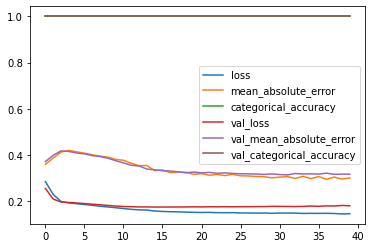

In [492]:
losses.plot()

In [493]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [494]:
 predictions=model.predict(X_test)

In [495]:
mean_squared_error(Y_test,predictions)

0.1810163119625868

In [496]:
mean_absolute_error(Y_test,predictions)

0.31739530342256095

In [497]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=7,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse',metrics=[metrics.mae, metrics.categorical_accuracy])


In [498]:
early_stop=EarlyStopping(monitor='val_loss',verbose=1,patience=25)

In [499]:
model.fit(x=X_train,y=Y_train,epochs=600,validation_data=(X_test,Y_test),
         callbacks=[early_stop])

Epoch 1/600
20/20 [==============================] - 1s 14ms/step - loss: 0.2490 - mean_absolute_error: 0.4989 - categorical_accuracy: 1.0000 - val_loss: 0.2480 - val_mean_absolute_error: 0.4980 - val_categorical_accuracy: 1.0000
Epoch 2/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2479 - mean_absolute_error: 0.4979 - categorical_accuracy: 1.0000 - val_loss: 0.2466 - val_mean_absolute_error: 0.4966 - val_categorical_accuracy: 1.0000
Epoch 3/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2460 - mean_absolute_error: 0.4959 - categorical_accuracy: 1.0000 - val_loss: 0.2452 - val_mean_absolute_error: 0.4951 - val_categorical_accuracy: 1.0000
Epoch 4/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2451 - mean_absolute_error: 0.4950 - categorical_accuracy: 1.0000 - val_loss: 0.2439 - val_mean_absolute_error: 0.4937 - val_categorical_accuracy: 1.0000
Epoch 5/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2435 - m

Epoch 37/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1954 - mean_absolute_error: 0.4356 - categorical_accuracy: 1.0000 - val_loss: 0.2037 - val_mean_absolute_error: 0.4425 - val_categorical_accuracy: 1.0000
Epoch 38/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1958 - mean_absolute_error: 0.4357 - categorical_accuracy: 1.0000 - val_loss: 0.2023 - val_mean_absolute_error: 0.4406 - val_categorical_accuracy: 1.0000
Epoch 39/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1934 - mean_absolute_error: 0.4327 - categorical_accuracy: 1.0000 - val_loss: 0.2013 - val_mean_absolute_error: 0.4389 - val_categorical_accuracy: 1.0000
Epoch 40/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1914 - mean_absolute_error: 0.4304 - categorical_accuracy: 1.0000 - val_loss: 0.2005 - val_mean_absolute_error: 0.4373 - val_categorical_accuracy: 1.0000
Epoch 41/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1860

Epoch 73/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1701 - mean_absolute_error: 0.3862 - categorical_accuracy: 1.0000 - val_loss: 0.1822 - val_mean_absolute_error: 0.3938 - val_categorical_accuracy: 1.0000
Epoch 74/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1676 - mean_absolute_error: 0.3822 - categorical_accuracy: 1.0000 - val_loss: 0.1817 - val_mean_absolute_error: 0.3925 - val_categorical_accuracy: 1.0000
Epoch 75/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1662 - mean_absolute_error: 0.3812 - categorical_accuracy: 1.0000 - val_loss: 0.1814 - val_mean_absolute_error: 0.3916 - val_categorical_accuracy: 1.0000
Epoch 76/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1586 - mean_absolute_error: 0.3707 - categorical_accuracy: 1.0000 - val_loss: 0.1811 - val_mean_absolute_error: 0.3902 - val_categorical_accuracy: 1.0000
Epoch 77/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1550

20/20 [==============================] - 0s 4ms/step - loss: 0.1396 - mean_absolute_error: 0.3318 - categorical_accuracy: 1.0000 - val_loss: 0.1778 - val_mean_absolute_error: 0.3670 - val_categorical_accuracy: 1.0000
Epoch 109/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1439 - mean_absolute_error: 0.3376 - categorical_accuracy: 1.0000 - val_loss: 0.1779 - val_mean_absolute_error: 0.3666 - val_categorical_accuracy: 1.0000
Epoch 110/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1459 - mean_absolute_error: 0.3408 - categorical_accuracy: 1.0000 - val_loss: 0.1776 - val_mean_absolute_error: 0.3659 - val_categorical_accuracy: 1.0000
Epoch 111/600
20/20 [==============================] - 0s 3ms/step - loss: 0.1457 - mean_absolute_error: 0.3378 - categorical_accuracy: 1.0000 - val_loss: 0.1777 - val_mean_absolute_error: 0.3656 - val_categorical_accuracy: 1.0000
Epoch 112/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1510 - mean_a

20/20 [==============================] - 0s 4ms/step - loss: 0.1411 - mean_absolute_error: 0.3191 - categorical_accuracy: 1.0000 - val_loss: 0.1771 - val_mean_absolute_error: 0.3520 - val_categorical_accuracy: 1.0000
Epoch 144/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1343 - mean_absolute_error: 0.3124 - categorical_accuracy: 1.0000 - val_loss: 0.1771 - val_mean_absolute_error: 0.3514 - val_categorical_accuracy: 1.0000
Epoch 145/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1386 - mean_absolute_error: 0.3192 - categorical_accuracy: 1.0000 - val_loss: 0.1770 - val_mean_absolute_error: 0.3514 - val_categorical_accuracy: 1.0000
Epoch 146/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1384 - mean_absolute_error: 0.3179 - categorical_accuracy: 1.0000 - val_loss: 0.1770 - val_mean_absolute_error: 0.3508 - val_categorical_accuracy: 1.0000
Epoch 147/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1402 - mean_a

In [500]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

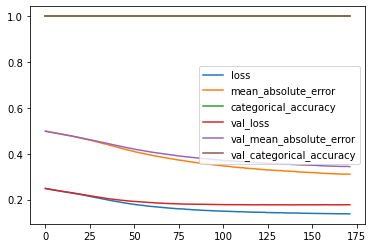

In [501]:
losses.plot()

In [502]:
from sklearn.metrics import mean_squared_error
predictions=model.predict(X_test)
print(mean_squared_error(Y_test,predictions ))



0.17744081047106067
